In [21]:
from IPython.display import display, HTML
display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

# <span style='color:red'>Ch4. RNN(Recurrent Neural Network 순환신경망)</span>

# 1. 문맥을 이용하여 모델만들기

In [22]:
text = """경마장에 있는 말이 띄고 있다
그 말이 법이다
가는 말이 고와야 오는 말이 곱다"""

# text1 = """장마철이 오고 있다"""

In [23]:
# 원환인코딩
# from tensorflow.keras.preprocessing.text import Tokenizer
# # from keras_preprocessing.text import Tokenizer
# t = Tokenizer()

# # 2. 텍스트 학습 (텍스트 안의 단어를 인덱스로 변환할 준비)
# t.fit_on_texts([text, text1])

# # 3. 시퀀스로 변환 (실제 인덱스 배열로 변환)
# encorded = t.texts_to_sequences([text, text1])

# print(encorded)
# print(t.word_index)

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
# from keras_preprocessing.text import Tokenizer
t = Tokenizer()

# 2. 텍스트 학습 (텍스트 안의 단어를 인덱스로 변환할 준비)
t.fit_on_texts([text])

# 3. 시퀀스로 변환 (실제 인덱스 배열로 변환)
encorded = t.texts_to_sequences([text])

print(encorded)
print(t.word_index)

[[2, 3, 1, 4, 5, 6, 1, 7, 8, 1, 9, 10, 1, 11]]
{'말이': 1, '경마장에': 2, '있는': 3, '띄고': 4, '있다': 5, '그': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [25]:
# 문자열 리스트를 인덱스 시쿼스로 변환
# 반드시 리스트 형식으로 넣어야 함
# 없는 단어는 나오지 않는다. (뛴다)
print(t.texts_to_sequences(['경마장에 말이 있다','말이 띈다']))
print(t.texts_to_sequences(['가는 말이 곱다'])[0])

[[2, 1, 5], [1]]
[8, 1, 11]


In [26]:
text = """경마장에 있는 말이 띄고 있다
그 말이 법이다
가는 말이 고와야 오는 말이 곱다"""

In [27]:
for key, value in t.word_index.items():
    print(key, value)


말이 1
경마장에 2
있는 3
띄고 4
있다 5
그 6
법이다 7
가는 8
고와야 9
오는 10
곱다 11


In [28]:
# 학습을 시키기 위해 ['경마장에 있는','경마장에 있는 말이',...]
sequences = []

for line in text.split('\n'):
    print('원문장 :', line)
    encorded = t.texts_to_sequences([line])[0]
    print('encorded 된 문장', encorded)

    for i in range(0, len(encorded)-1): # i:시작index
        for j in range(i + 2, len(encorded)+1): # j:끝나는 index 바로 뒤
            # print(encorded[i:j])
            sequences.append(encorded[i:j])

# print(sequences)
print('sequence와 해석 출력')
for sequence in sequences:
    for word_seq in sequence:
        # print(word_seq)
        for word, id in t.word_index.items():
            if word_seq == id :
                print("{}:{}".format(word_seq, word), end=' ')
                break
    print()
            

원문장 : 경마장에 있는 말이 띄고 있다
encorded 된 문장 [2, 3, 1, 4, 5]
원문장 : 그 말이 법이다
encorded 된 문장 [6, 1, 7]
원문장 : 가는 말이 고와야 오는 말이 곱다
encorded 된 문장 [8, 1, 9, 10, 1, 11]
sequence와 해석 출력
2:경마장에 3:있는 
2:경마장에 3:있는 1:말이 
2:경마장에 3:있는 1:말이 4:띄고 
2:경마장에 3:있는 1:말이 4:띄고 5:있다 
3:있는 1:말이 
3:있는 1:말이 4:띄고 
3:있는 1:말이 4:띄고 5:있다 
1:말이 4:띄고 
1:말이 4:띄고 5:있다 
4:띄고 5:있다 
6:그 1:말이 
6:그 1:말이 7:법이다 
1:말이 7:법이다 
8:가는 1:말이 
8:가는 1:말이 9:고와야 
8:가는 1:말이 9:고와야 10:오는 
8:가는 1:말이 9:고와야 10:오는 1:말이 
8:가는 1:말이 9:고와야 10:오는 1:말이 11:곱다 
1:말이 9:고와야 
1:말이 9:고와야 10:오는 
1:말이 9:고와야 10:오는 1:말이 
1:말이 9:고와야 10:오는 1:말이 11:곱다 
9:고와야 10:오는 
9:고와야 10:오는 1:말이 
9:고와야 10:오는 1:말이 11:곱다 
10:오는 1:말이 
10:오는 1:말이 11:곱다 
1:말이 11:곱다 


In [29]:
print([len(sequence) for sequence in sequences])

# my_len = max([len(sequence) for sequence in sequences])
my_len = max(len(sequence) for sequence in sequences)
my_len

[2, 3, 4, 5, 2, 3, 4, 2, 3, 2, 2, 3, 2, 2, 3, 4, 5, 6, 2, 3, 4, 5, 2, 3, 4, 2, 3, 2]


6

In [30]:
# sequences를 훈련 가능하도록 모두 6개로 조정 - padding작업
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences=sequences, 
                                maxlen=my_len, 
                                # padding='post',
                                padding='pre'
                                )
# padded_sequences
padded_sequences.shape, type(padded_sequences)


((28, 6), numpy.ndarray)

In [31]:
# 독립변수(X)와 타켓변수(y)로 분리
X = padded_sequences[:,:-1]
y = padded_sequences[:,-1]
X[:5]
y[:5]


array([3, 1, 4, 5, 1], dtype=int32)

In [32]:
# X를 엠베딩 작업할 떄 필요한 입력 bit 수 (단어수 + 1)
# print(len(t.word_index))
input_dim = len(t.word_index) + 1
input_dim

12

In [33]:
# y 의 원핫인코딩
from tensorflow.keras.utils import to_categorical
Y = to_categorical(y, input_dim)
X.shape, Y.shape, input_dim

((28, 5), (28, 12), 12)

In [34]:
%%time
# 2 모델 생성하기
from pickletools import optimize
from tabnanny import verbose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding # Xi의 원홧인코딩한 희소행렬 변환
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

model = Sequential()

model.add(Embedding(input_dim=input_dim,    # 12개로 원핫인코딩
                    output_dim=10,          # 임베딩 출력의 갯수
                    input_length=X.shape[1]))
model.add(SimpleRNN(units=32))

model.add(Dense(units=12, activation='softmax'))

print(model.summary())

# 3. 모델 학습 과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X, Y, epochs=300, verbose=2)

/Users/teamkim/anaconda3/envs/ml-dl-nlp/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/300
1/1 - 1s - 992ms/step - accuracy: 0.0714 - loss: 2.4773
Epoch 2/300
1/1 - 0s - 64ms/step - accuracy: 0.1071 - loss: 2.4634
Epoch 3/300
1/1 - 0s - 61ms/step - accuracy: 0.1429 - loss: 2.4493
Epoch 4/300
1/1 - 0s - 61ms/step - accuracy: 0.1429 - loss: 2.4349
Epoch 5/300
1/1 - 0s - 60ms/step - accuracy: 0.1429 - loss: 2.4202
Epoch 6/300
1/1 - 0s - 62ms/step - accuracy: 0.1786 - loss: 2.4050
Epoch 7/300
1/1 - 0s - 62ms/step - accuracy: 0.2500 - loss: 2.3893
Epoch 8/300
1/1 - 0s - 61ms/step - accuracy: 0.2500 - loss: 2.3730
Epoch 9/300
1/1 - 0s - 63ms/step - accuracy: 0.2500 - loss: 2.3561
Epoch 10/300
1/1 - 0s - 62ms/step - accuracy: 0.3214 - loss: 2.3385
Epoch 11/300
1/1 - 0s - 66ms/step - accuracy: 0.3214 - loss: 2.3203
Epoch 12/300
1/1 - 0s - 86ms/step - accuracy: 0.3214 - loss: 2.3013
Epoch 13/300
1/1 - 0s - 83ms/step - accuracy: 0.3571 - loss: 2.2816
Epoch 14/300
1/1 - 0s - 81ms/step - accuracy: 0.3214 - loss: 2.2612
Epoch 15/300
1/1 - 0s - 76ms/step - accuracy: 0.285

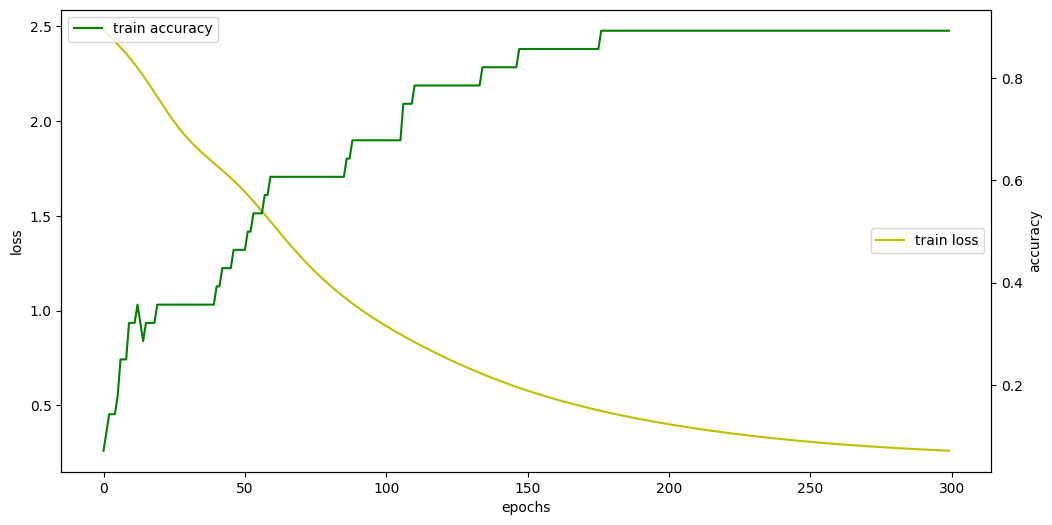

In [35]:
# 학습과정
# 그래프
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [36]:
# 모델 사용하기 (경마장에 → 있는)
from tabnanny import verbose

input_word = input('입력단어 :')
# ecoded = t.texts_to_sequences(['경마장에 있는 말이'])[0]
ecoded = t.texts_to_sequences([input_word])[0]

input_data = pad_sequences([ecoded], maxlen=my_len-1, padding='pre')
print('입력데이터 :',input_data)
result = model.predict(input_data, verbose=0).argmax()

# word = t.index_word.get(result,'??')
word = t.index_word[result]
print('예츧된 단어 :', word)


입력데이터 : [[0 0 0 0 1]]
예츧된 단어 : 고와야


In [37]:
t.texts_to_sequences(['업는 단어'])

[[]]

# 2. 다음 문맥 예측해 보기

In [40]:
# "경마장"에 이후에 올 단어를 3개 예측 → 경마장에 있는 말이 뛰고
def sentence_generation(current_word, n):
    # print('입력된 단어 :', current_word)
    for i in range(1, n+1):
        encoded = t.texts_to_sequences([current_word])[0]
        # print(encoded)
        input_data = pad_sequences([encoded], maxlen=my_len-1, padding='pre')
        # print(input_date)
        result = model.predict(input_data, verbose=0).argmax()
        word = t.index_word[result]
        # print(current_word + ' ' + word)
        current_word = current_word + ' ' + word
        # print('{}번째 생성 문맥 {} ( {} {} )'.format(i, current_word, encoded, result))
    return current_word     

sentence_generation('경마장에', 3)


'경마장에 있는 말이 띄고'

In [41]:
sentence_generation('그 말이', 5)

'그 말이 법이다 있다 말이 법이다 오는'